# TP : EDA + Prétraitement

Nom et prénom : BEYER-BONNIARD Lucas

Nous allons exploiter un jeu de données au format CSV afin de mettre en pratique les concepts abordés durant le cours.

1 - Analyse exploratoire des données :

* Calculer les statistiques de base, telles que la moyenne, la médiane, la variance, le maximum et le minimum.
* Examiner les distributions et identifier les valeurs aberrantes.
* Analyse univariée / bivariée / multivariée
* Calculer les corrélations entre les variables.

2 - Prétraitement de données:
* Traiter les valeurs manquantes.
* Traiter les valeurs aberrantes.
* Encoder les variables qualitatives.
* Créer des nouvelles variables

Ceci est un simple rappel de quelques étapes. Vous êtes libre d'effectuer l'analyse et la préparation des données dans l'ordre et avec les méthodes de votre choix.

Dans ce TP, votre note sera attribuée en fonction des éléments suivants :
- Clarté et Structure du Rapport 20%
- Approche et Méthodes 30%
- Résultats et Interprétation 30%
- Code et Exécution 20%

## L'objectif du projet

Le marché des voitures d'occasion en Inde connaît une forte demande, surpassant désormais celui des voitures neuves. Cars4U, une start-up technologique, cherche à exploiter cette tendance. Étant donné l'incertitude élevée dans la tarification et l'approvisionnement des voitures d'occasion, il est crucial de développer un modèle de tarification efficace.

L'objectif de ce TP est de réaliser une analyse exploratoire des données afin de comprendre les facteurs influençant le prix des voitures d'occasion et d'obtenir des résultats sur ces éléments. Un autre objectif est de préparer le dataset pour la modélisation, par exemple en vue d'une régression linéaire, pour prédire de manière plus précise le prix des véhicules.

## Le jeu de données

Télécharger le fichier used_cars_data.csv qui sera notre jeu de données pour ce TP. https://www.kaggle.com/datasets/sukhmanibedi/cars4u

Les attributs sont définis comme suit :

* S.No. : Numéro de série
* Name : Nom de la voiture, incluant la marque et le modèle
* Location : ville où la voiture est vendue ou disponible à l'achat
* Year : Année de fabrication de la voiture
* Kilometers_driven : Le nombre total de kilomètres parcourus par le précédent propriétaire ou les précédents propriétaires, en kilomètres (KM)
* Fuel_Type : Le type de carburant utilisé par la voiture (Essence, Diesel, Électrique, CNG, LPG)
* Transmission : Le type de transmission de la voiture (Automatique / Manuelle)
* Owner : Type de propriétaire
* Mileage : La consommation standard de la voiture, exprimée en km/litre ou km/kg
* Engine : La cylindrée du moteur en CC
* Power : La puissance maximale du moteur en chevaux-vapeur en bhp
* Seats : Le nombre de sièges dans la voiture
* New_Price : Le prix d'une voiture neuve du même modèle en INR Lakhs (1 Lakh = 100 000) et en Crore
* Price : Le prix de la voiture d'occasion en INR Lakhs (1 Lakh = 100 000)

# TP


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

HEADER = '\033[95m'
BLUE = '\033[94m'
CYAN = '\033[96m'
GREEN = '\033[92m'
WARNING = '\033[93m'
FAIL = '\033[91m'
ENDC = '\033[0m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'

df = pd.read_csv('used_cars_data.csv')
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Formatage des données

In [71]:
df['Mileage'] = df['Mileage'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
df['Engine'] = df['Engine'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
df['Power'] = df['Power'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
df.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


Ici j'ai formaté les données de la colonne Mileage, Engine et Power en float, car elles sont en string, et donc il est impossible de faire des calculs dessus.

## Statistiques de base

In [72]:
print(f'{HEADER}Statistiques de base:{ENDC}')
print(f'{CYAN}{df.describe()}{ENDC}')

numerical_columns = df.select_dtypes(include=[np.number]).columns

print(f'\n{HEADER}Variance pour chaque variable numérique:{ENDC}')
for col in numerical_columns:
    print(f'{CYAN}{col}: {BOLD}{df[col].var():.2f}{ENDC}')

Statistiques de base:
             S.No.         Year  Kilometers_Driven      Mileage       Engine  \
count  7253.000000  7253.000000       7.253000e+03  7251.000000  7207.000000   
mean   3626.000000  2013.365366       5.869906e+04    18.141580  1616.573470   
std    2093.905084     3.254421       8.442772e+04     4.562197   595.285137   
min       0.000000  1996.000000       1.710000e+02     0.000000    72.000000   
25%    1813.000000  2011.000000       3.400000e+04    15.170000  1198.000000   
50%    3626.000000  2014.000000       5.341600e+04    18.160000  1493.000000   
75%    5439.000000  2016.000000       7.300000e+04    21.100000  1968.000000   
max    7252.000000  2019.000000       6.500000e+06    33.540000  5998.000000   

             Power        Seats        Price  
count  7078.000000  7200.000000  6019.000000  
mean    112.765214     5.279722     9.479468  
std      53.493553     0.811660    11.187917  
min      34.200000     0.000000     0.440000  
25%      75.000000    

## Examiner les distributions et identifier les valeurs aberrantes.

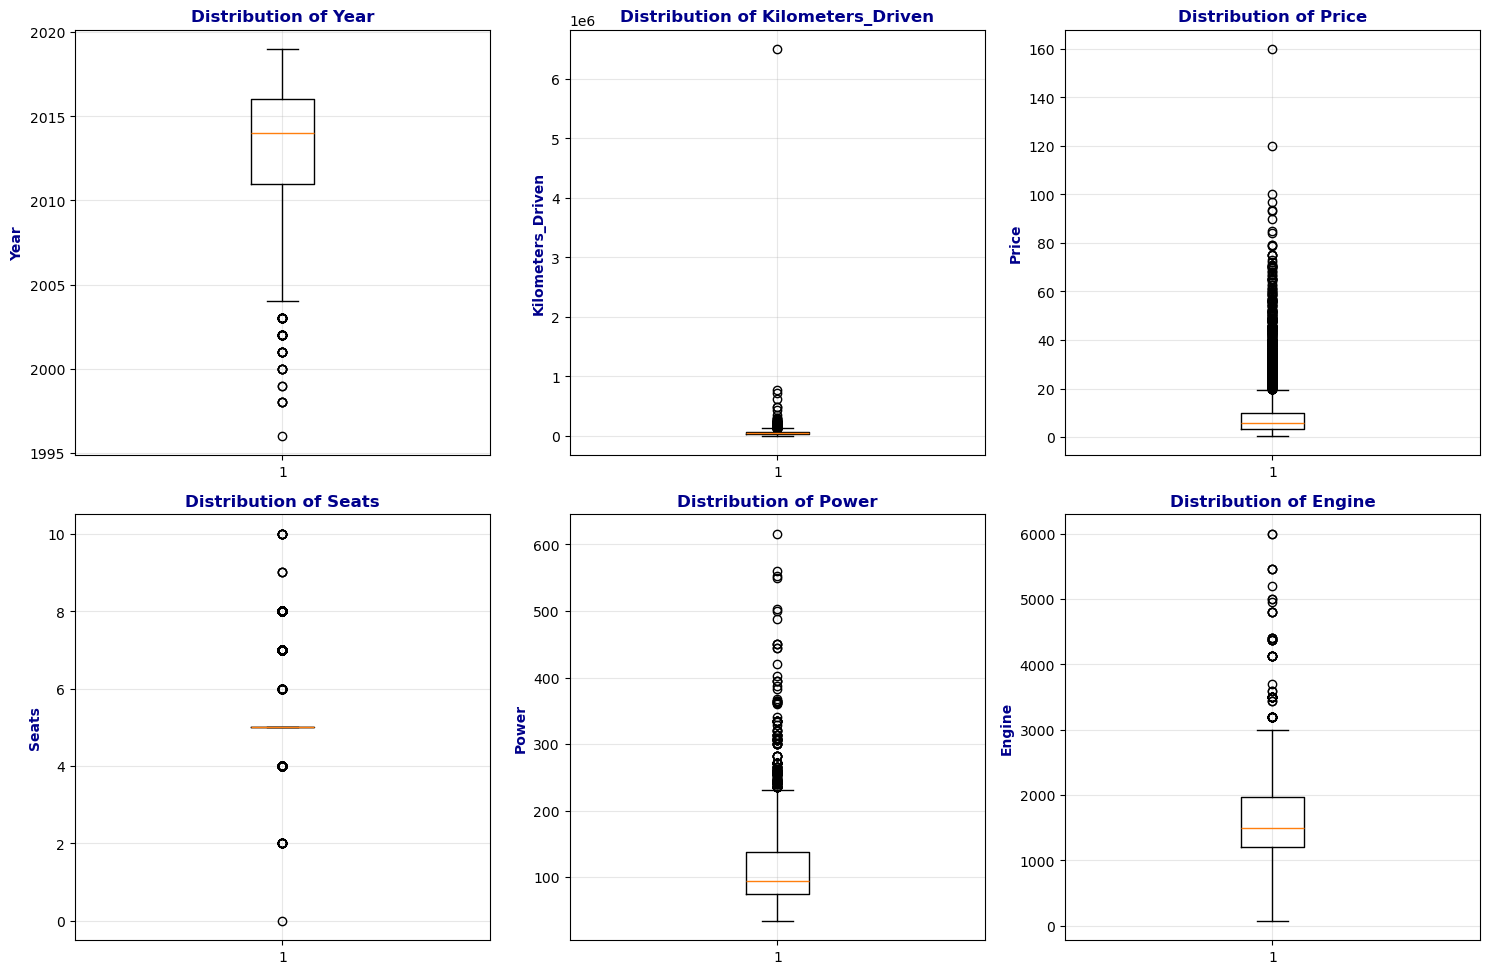

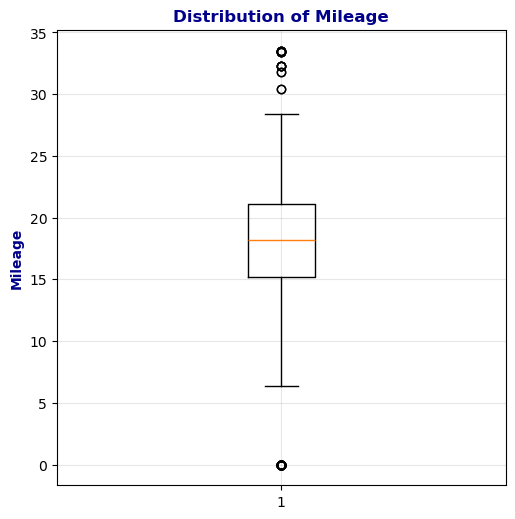

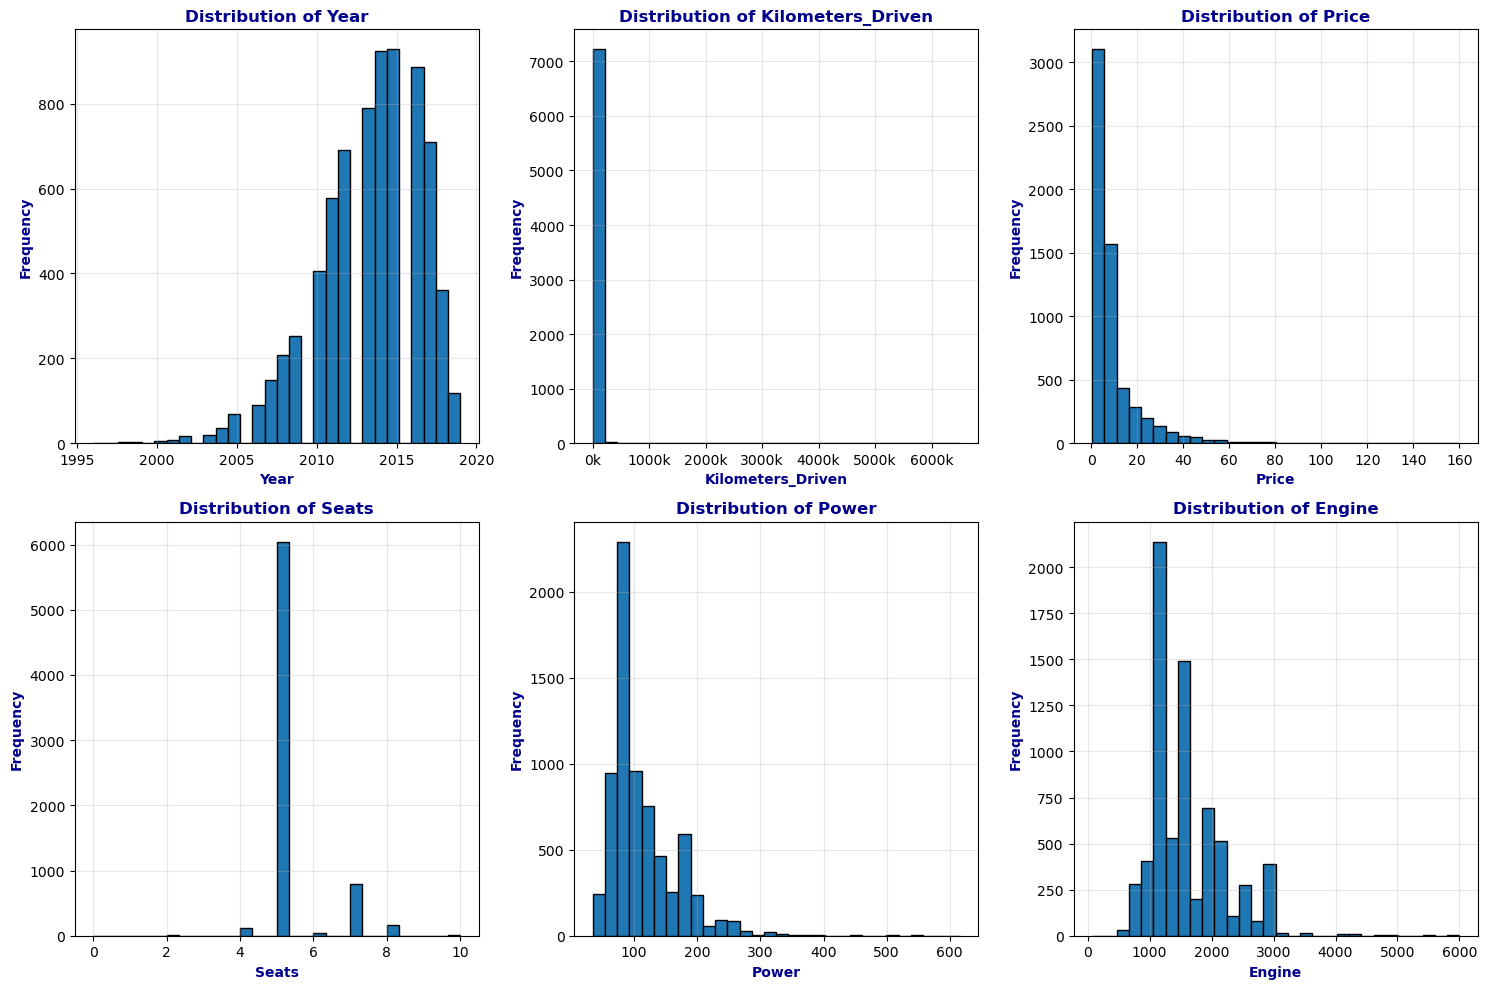

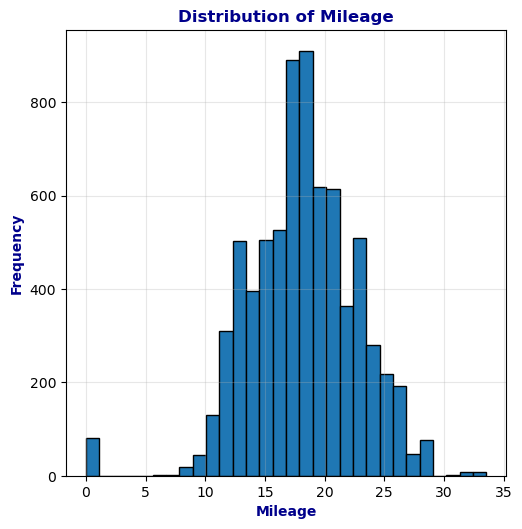

Analyse des valeurs aberrantes:

Year:
Nombre de valeurs aberrantes: 58
Limite inférieure: 2003.50
Limite supérieure: 2023.50
Valeur minimale: 1996.00
Valeur maximale: 2019.00

Kilometers_Driven:
Nombre de valeurs aberrantes: 258
Limite inférieure: -24500.00
Limite supérieure: 131500.00
Valeur minimale: 171.00
Valeur maximale: 6500000.00

Price:
Nombre de valeurs aberrantes: 718
Limite inférieure: -6.17
Limite supérieure: 19.62
Valeur minimale: 0.44
Valeur maximale: 160.00

Seats:
Nombre de valeurs aberrantes: 1153
Limite inférieure: 5.00
Limite supérieure: 5.00
Valeur minimale: 0.00
Valeur maximale: 10.00

Power:
Nombre de valeurs aberrantes: 273
Limite inférieure: -19.65
Limite supérieure: 232.75
Valeur minimale: 34.20
Valeur maximale: 616.00

Engine:
Nombre de valeurs aberrantes: 65
Limite inférieure: 43.00
Limite supérieure: 3123.00
Valeur minimale: 72.00
Valeur maximale: 5998.00

Mileage:
Nombre de valeurs aberrantes: 99
Limite inférieure: 6.27
Limite supérieure: 30.00
Valeur mini

In [73]:
numerical_features = ['Year', 'Kilometers_Driven', 'Price', 'Seats', 'Power', 'Engine', 'Mileage']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:6], 1):
    plt.subplot(2, 3, i)
    data = df[feature].dropna()
    plt.boxplot(data)
    plt.title(f'Distribution of {feature}', color='darkblue', fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.ylabel(feature, color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 6)
data = df['Mileage'].dropna()
plt.boxplot(data)
plt.title('Distribution of Mileage', color='darkblue', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.ylabel('Mileage', color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[:6], 1):
    plt.subplot(2, 3, i)
    data = df[feature].dropna()
    plt.hist(data, bins=30, edgecolor='black')
    plt.title(f'Distribution of {feature}', color='darkblue', fontweight='bold')
    plt.grid(True, alpha=0.3)
    if feature == 'Kilometers_Driven':
        plt.gca().xaxis.set_major_formatter(lambda x, p: f'{int(x/1000)}k')
    plt.xlabel(feature, color='darkblue', fontweight='bold')
    plt.ylabel('Frequency', color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 6)
data = df['Mileage'].dropna()
plt.hist(data, bins=30, edgecolor='black')
plt.title('Distribution of Mileage', color='darkblue', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlabel('Mileage', color='darkblue', fontweight='bold')
plt.ylabel('Frequency', color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show()

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

print(f'{HEADER}Analyse des valeurs aberrantes:{ENDC}')
for feature in numerical_features:
    n_outliers, lower, upper = detect_outliers(df, feature)
    print(f'\n{CYAN}{feature}:{ENDC}')
    print(f'{BLUE}Nombre de valeurs aberrantes: {BOLD}{n_outliers}{ENDC}')
    print(f'{BLUE}Limite inférieure: {BOLD}{lower:.2f}{ENDC}')
    print(f'{BLUE}Limite supérieure: {BOLD}{upper:.2f}{ENDC}')
    print(f'{BLUE}Valeur minimale: {BOLD}{df[feature].min():.2f}{ENDC}')
    print(f'{BLUE}Valeur maximale: {BOLD}{df[feature].max():.2f}{ENDC}')

Ici on voit que les valeurs aberrantes sont les valeurs qui sont en dehors de la boite à moustache. Mais certaines valeurs peuvent parraitre aberrantes mais ne le sont pas, exemple:
- Le prix des voitures d'occasion est en général compris entre 1 et 10 Lakh INR. Mais il existe des voitures d'occasion qui sont vendues à des prix très élevés, jusqu'à 100 Lakh INR.
- Le nombre de kilomètres parcourus par une voiture d'occasion est en général compris entre 0 et 100 000 km. Mais il existe des voitures d'occasion qui ont parcouru des centaines de milliers de kilomètres.






## Nettoyage des données quantitatives

In [74]:
df_original = df.copy()
initial_rows = len(df)

print(f"\n{CYAN}KILOMÈTRES{ENDC}")
rows_before_km = len(df)
df_clean = df.copy()
print(f"""{BLUE}Nombre de lignes avant traitement : {BOLD}{rows_before_km}{ENDC}
{BLUE}Valeurs manquantes : {BOLD}{df_clean['Kilometers_Driven'].isnull().sum()}{ENDC}
{BLUE}Valeurs négatives : {BOLD}{len(df_clean[df_clean['Kilometers_Driven'] < 0])}{ENDC}
{BLUE}Valeurs > 1 million : {BOLD}{len(df_clean[df_clean['Kilometers_Driven'] > 1000000])}{ENDC}""")

df_clean = df_clean[
    df_clean['Kilometers_Driven'].notnull() & 
    (df_clean['Kilometers_Driven'] >= 0) & 
    (df_clean['Kilometers_Driven'] <= 1000000)
]
rows_after_km = len(df_clean)
print(f"""{BLUE}Nombre de lignes après traitement : {BOLD}{rows_after_km}{ENDC}
{BLUE}Lignes supprimées (total) : {BOLD}{rows_before_km - rows_after_km}{ENDC}\n""")

print(f"{CYAN}PRIX{ENDC}")
rows_before_price = len(df_clean)
print(f"""{BLUE}Nombre de lignes avant traitement : {BOLD}{rows_before_price}{ENDC}
{BLUE}Valeurs manquantes : {BOLD}{df_clean['Price'].isnull().sum()}{ENDC}
{BLUE}Valeurs négatives ou nulles : {BOLD}{len(df_clean[df_clean['Price'] <= 0])}{ENDC}""")

df_clean = df_clean[
    df_clean['Price'].notnull() & 
    (df_clean['Price'] > 0)
]
rows_after_price = len(df_clean)
print(f"""{BLUE}Nombre de lignes après traitement : {BOLD}{rows_after_price}{ENDC}
{BLUE}Lignes supprimées (total) : {BOLD}{rows_before_price - rows_after_price}{ENDC}\n""")

print(f"{CYAN}SIÈGES{ENDC}")
rows_before_seats = len(df_clean)
missing_seats = df_clean['Seats'].isnull().sum()
zero_seats = len(df_clean[df_clean['Seats'] == 0])
print(f"""{BLUE}Nombre de lignes avant traitement : {BOLD}{rows_before_seats}{ENDC}
{BLUE}Valeurs manquantes : {BOLD}{missing_seats}{ENDC}
{BLUE}Valeurs à 0 : {BOLD}{zero_seats}{ENDC}""")

df_clean = df_clean[df_clean['Seats'].notnull()]
median_seats = df_clean['Seats'].median()
zeros_to_replace = len(df_clean[df_clean['Seats'] == 0])
df_clean.loc[df_clean['Seats'] == 0, 'Seats'] = median_seats

rows_after_seats = len(df_clean)
print(f"""{BLUE}Valeur médiane pour remplacement : {BOLD}{median_seats}{ENDC}
{BLUE}Nombre de lignes après traitement : {BOLD}{rows_after_seats}{ENDC}
{BLUE}Lignes supprimées (valeurs manquantes) : {BOLD}{rows_before_seats - rows_after_seats}{ENDC}
{BLUE}Valeurs modifiées (0 remplacés par {median_seats}) : {BOLD}{zeros_to_replace}{ENDC}\n""")

print(f"{CYAN}POWER{ENDC}")
rows_before_power = len(df_clean)
print(f"""{BLUE}Nombre de lignes avant traitement : {BOLD}{rows_before_power}{ENDC}
{BLUE}Valeurs manquantes : {BOLD}{df_clean['Power'].isnull().sum()}{ENDC}
{BLUE}Valeurs négatives : {BOLD}{len(df_clean[df_clean['Power'] < 0])}{ENDC}
{BLUE}Valeurs > 600 : {BOLD}{len(df_clean[df_clean['Power'] > 600])}{ENDC}""")

df_clean = df_clean[
    df_clean['Power'].notnull() & 
    (df_clean['Power'] > 0) & 
    (df_clean['Power'] <= 600)
]
rows_after_power = len(df_clean)
print(f"""{BLUE}Nombre de lignes après traitement : {BOLD}{rows_after_power}{ENDC}
{BLUE}Lignes supprimées (total) : {BOLD}{rows_before_power - rows_after_power}{ENDC}\n""")

print(f"{CYAN}ENGINE{ENDC}")
rows_before_engine = len(df_clean)
print(f"""{BLUE}Nombre de lignes avant traitement : {BOLD}{rows_before_engine}{ENDC}
{BLUE}Valeurs manquantes : {BOLD}{df_clean['Engine'].isnull().sum()}{ENDC}
{BLUE}Valeurs < 500cc : {BOLD}{len(df_clean[df_clean['Engine'] < 500])}{ENDC}
{BLUE}Valeurs > 6000cc : {BOLD}{len(df_clean[df_clean['Engine'] > 6000])}{ENDC}""")

df_clean = df_clean[
    df_clean['Engine'].notnull() & 
    (df_clean['Engine'] >= 500) & 
    (df_clean['Engine'] <= 6000)
]
rows_after_engine = len(df_clean)
print(f"""{BLUE}Nombre de lignes après traitement : {BOLD}{rows_after_engine}{ENDC}
{BLUE}Lignes supprimées (total) : {BOLD}{rows_before_engine - rows_after_engine}{ENDC}\n""")

print(f"{CYAN}MILEAGE{ENDC}")
rows_before_mileage = len(df_clean)
print(f"""{BLUE}Nombre de lignes avant traitement : {BOLD}{rows_before_mileage}{ENDC}
{BLUE}Valeurs manquantes : {BOLD}{df_clean['Mileage'].isnull().sum()}{ENDC}
{BLUE}Valeurs = 0 : {BOLD}{len(df_clean[df_clean['Mileage'] == 0])}{ENDC}
{BLUE}Valeurs < 5 : {BOLD}{len(df_clean[df_clean['Mileage'] < 5])}{ENDC}
{BLUE}Valeurs > 35 : {BOLD}{len(df_clean[df_clean['Mileage'] > 35])}{ENDC}""")

df_clean = df_clean[
    df_clean['Mileage'].notnull() & 
    (df_clean['Mileage'] > 0) & 
    (df_clean['Mileage'] >= 5) & 
    (df_clean['Mileage'] <= 35)
]
rows_after_mileage = len(df_clean)
print(f"""{BLUE}Nombre de lignes après traitement : {BOLD}{rows_after_mileage}{ENDC}
{BLUE}Lignes supprimées (total) : {BOLD}{rows_before_mileage - rows_after_mileage}{ENDC}\n""")

total_removed = initial_rows - len(df_clean)
print(f"""{HEADER}Résumé:{ENDC}
{BLUE}Nombre total de lignes supprimées : {BOLD}{total_removed}{ENDC}
{BLUE}Nombre de lignes restantes : {BOLD}{len(df_clean)}{ENDC}""")


KILOMÈTRES
Nombre de lignes avant traitement : 7253
Valeurs manquantes : 0
Valeurs négatives : 0
Valeurs > 1 million : 1
Nombre de lignes après traitement : 7252
Lignes supprimées (total) : 1

PRIX
Nombre de lignes avant traitement : 7252
Valeurs manquantes : 1234
Valeurs négatives ou nulles : 0
Nombre de lignes après traitement : 6018
Lignes supprimées (total) : 1234

SIÈGES
Nombre de lignes avant traitement : 6018
Valeurs manquantes : 42
Valeurs à 0 : 1
Valeur médiane pour remplacement : 5.0
Nombre de lignes après traitement : 5976
Lignes supprimées (valeurs manquantes) : 42
Valeurs modifiées (0 remplacés par 5.0) : 1

POWER
Nombre de lignes avant traitement : 5976
Valeurs manquantes : 103
Valeurs négatives : 0
Valeurs > 600 : 0
Nombre de lignes après traitement : 5873
Lignes supprimées (total) : 103

ENGINE
Nombre de lignes avant traitement : 5873
Valeurs manquantes : 0
Valeurs < 500cc : 1
Valeurs > 6000cc : 0
Nombre de lignes après traitement : 5872
Lignes supprimées (total) : 1




J'ai choisi de supprimer les lignes dont il manquait les données suivantes:
- Kilomètres_Driven
- Price
- Power (puissance du moteur étant une caractéristique essentielle d'une voiture)
- Engine (la cylindrée étant directement liée à la puissance et la consommation)
- Mileage (la consommation étant un critère important dans le choix d'une voiture)

Car il n'est pas possible de faire de l'analyse sans ces données, très importantes.

J'ai aussi décidé de garder toutes les années, car il n'y a pas de données aberrantes.

Pour les valeurs aberrantes, j'ai appliqué les filtres suivants :
- Power : suppression des valeurs négatives et > 600 chevaux (limite réaliste pour les voitures de série)
- Engine : suppression des valeurs < 500cc (trop petit pour une voiture) et > 6000cc (limite des plus grosses voitures)
- Mileage : suppression des valeurs = 0 (impossible) et > 35 km/L (peu réaliste)

Et j'ai décidé de remplacer les valeurs à 0 pour le nombre de sièges par la médiane, car le nombre de sièges n'est pas une donnée si importante dans cette étude.


## Nettoyage des données qualitatives

In [75]:
df_original_qual = df_clean.copy()
initial_rows = len(df_clean)

print(f"{CYAN}Colonnes disponibles dans le dataset :{ENDC}")
print(f"{BLUE}{df_clean.columns.tolist()}{ENDC}\n")

categorical_columns = df_clean.select_dtypes(include=['object']).columns
print(f"{CYAN}Colonnes catégorielles disponibles :{ENDC}")
print(f"{BLUE}{categorical_columns.tolist()}{ENDC}\n")

df_clean_qual = df_clean.copy()

print(f"\n{CYAN}NAME{ENDC}")
rows_before_name = len(df_clean_qual)
print(f"""{BLUE}Nombre de lignes avant traitement : {BOLD}{rows_before_name}{ENDC}
{BLUE}Valeurs manquantes : {BOLD}{df_clean_qual['Name'].isnull().sum()}{ENDC}
{BLUE}Nombre de valeurs uniques actuelles : {BOLD}{df_clean_qual['Name'].nunique()}{ENDC}""")

original_names = df_clean_qual['Name'].copy()
df_clean_qual['Name'] = df_clean_qual['Name'].str.lower().str.strip()
modified_names = (original_names != df_clean_qual['Name']).sum()
df_clean_qual = df_clean_qual[df_clean_qual['Name'].notnull()]

print(f"""{BLUE}Nombre de valeurs uniques après nettoyage : {BOLD}{df_clean_qual['Name'].nunique()}{ENDC}
{BLUE}Nombre de lignes après traitement : {BOLD}{len(df_clean_qual)}{ENDC}
{BLUE}Lignes supprimées : {BOLD}{rows_before_name - len(df_clean_qual)}{ENDC}
{BLUE}Valeurs modifiées : {BOLD}{modified_names}{ENDC}\n""")

print(f"{CYAN}LOCATION{ENDC}")
rows_before_loc = len(df_clean_qual)
print(f"""{BLUE}Nombre de lignes avant traitement : {BOLD}{rows_before_loc}{ENDC}
{BLUE}Valeurs manquantes : {BOLD}{df_clean_qual['Location'].isnull().sum()}{ENDC}
{BLUE}Valeurs uniques actuelles : {BOLD}{df_clean_qual['Location'].unique()}{ENDC}""")

original_locations = df_clean_qual['Location'].copy()
df_clean_qual['Location'] = df_clean_qual['Location'].str.lower().str.strip()
modified_locations = (original_locations != df_clean_qual['Location']).sum()
df_clean_qual = df_clean_qual[df_clean_qual['Location'].notnull()]

print(f"""{BLUE}Valeurs uniques après nettoyage : {BOLD}{df_clean_qual['Location'].unique()}{ENDC}
{BLUE}Nombre de lignes après traitement : {BOLD}{len(df_clean_qual)}{ENDC}
{BLUE}Lignes supprimées : {BOLD}{rows_before_loc - len(df_clean_qual)}{ENDC}
{BLUE}Valeurs modifiées : {BOLD}{modified_locations}{ENDC}\n""")

print(f"{CYAN}FUEL TYPE{ENDC}")
rows_before_fuel = len(df_clean_qual)
print(f"""{BLUE}Nombre de lignes avant traitement : {BOLD}{rows_before_fuel}{ENDC}
{BLUE}Valeurs manquantes : {BOLD}{df_clean_qual['Fuel_Type'].isnull().sum()}{ENDC}
{BLUE}Valeurs uniques actuelles : {BOLD}{df_clean_qual['Fuel_Type'].unique()}{ENDC}""")

original_fuel = df_clean_qual['Fuel_Type'].copy()
df_clean_qual['Fuel_Type'] = df_clean_qual['Fuel_Type'].str.lower().str.strip()
modified_fuel = (original_fuel != df_clean_qual['Fuel_Type']).sum()
df_clean_qual = df_clean_qual[df_clean_qual['Fuel_Type'].notnull()]

print(f"""{BLUE}Valeurs uniques après nettoyage : {BOLD}{df_clean_qual['Fuel_Type'].unique()}{ENDC}
{BLUE}Nombre de lignes après traitement : {BOLD}{len(df_clean_qual)}{ENDC}
{BLUE}Lignes supprimées : {BOLD}{rows_before_fuel - len(df_clean_qual)}{ENDC}
{BLUE}Valeurs modifiées : {BOLD}{modified_fuel}{ENDC}\n""")

print(f"{CYAN}TRANSMISSION{ENDC}")
rows_before_trans = len(df_clean_qual)
print(f"""{BLUE}Nombre de lignes avant traitement : {BOLD}{rows_before_trans}{ENDC}
{BLUE}Valeurs manquantes : {BOLD}{df_clean_qual['Transmission'].isnull().sum()}{ENDC}
{BLUE}Valeurs uniques actuelles : {BOLD}{df_clean_qual['Transmission'].unique()}{ENDC}""")

original_trans = df_clean_qual['Transmission'].copy()
df_clean_qual['Transmission'] = df_clean_qual['Transmission'].str.lower().str.strip()
modified_trans = (original_trans != df_clean_qual['Transmission']).sum()
df_clean_qual = df_clean_qual[df_clean_qual['Transmission'].notnull()]

print(f"""{BLUE}Valeurs uniques après nettoyage : {BOLD}{df_clean_qual['Transmission'].unique()}{ENDC}
{BLUE}Nombre de lignes après traitement : {BOLD}{len(df_clean_qual)}{ENDC}
{BLUE}Lignes supprimées : {BOLD}{rows_before_trans - len(df_clean_qual)}{ENDC}
{BLUE}Valeurs modifiées : {BOLD}{modified_trans}{ENDC}\n""")

print(f"{CYAN}OWNER TYPE{ENDC}")
rows_before_owner = len(df_clean_qual)
print(f"""{BLUE}Nombre de lignes avant traitement : {BOLD}{rows_before_owner}{ENDC}
{BLUE}Valeurs manquantes : {BOLD}{df_clean_qual['Owner_Type'].isnull().sum()}{ENDC}
{BLUE}Valeurs uniques actuelles : {BOLD}{df_clean_qual['Owner_Type'].unique()}{ENDC}""")

original_owner = df_clean_qual['Owner_Type'].copy()
df_clean_qual['Owner_Type'] = df_clean_qual['Owner_Type'].str.lower().str.strip()
modified_owner = (original_owner != df_clean_qual['Owner_Type']).sum()
df_clean_qual = df_clean_qual[df_clean_qual['Owner_Type'].notnull()]

print(f"""{BLUE}Valeurs uniques après nettoyage : {BOLD}{df_clean_qual['Owner_Type'].unique()}{ENDC}
{BLUE}Nombre de lignes après traitement : {BOLD}{len(df_clean_qual)}{ENDC}
{BLUE}Lignes supprimées : {BOLD}{rows_before_owner - len(df_clean_qual)}{ENDC}
{BLUE}Valeurs modifiées : {BOLD}{modified_owner}{ENDC}\n""")

total_removed = initial_rows - len(df_clean_qual)
total_modified = modified_names + modified_locations + modified_fuel + modified_trans + modified_owner

print(f"""{HEADER}Résumé:{ENDC}
{BLUE}Nombre total de lignes supprimées : {BOLD}{total_removed}{ENDC}
{BLUE}Nombre total de valeurs modifiées : {BOLD}{total_modified}{ENDC}
{BLUE}Nombre de lignes restantes : {BOLD}{len(df_clean_qual)}{ENDC}""")

Colonnes disponibles dans le dataset :
['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']

Colonnes catégorielles disponibles :
['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'New_Price']


NAME
Nombre de lignes avant traitement : 5843
Valeurs manquantes : 0
Nombre de valeurs uniques actuelles : 1802
Nombre de valeurs uniques après nettoyage : 1778
Nombre de lignes après traitement : 5843
Lignes supprimées : 0
Valeurs modifiées : 5843

LOCATION
Nombre de lignes avant traitement : 5843
Valeurs manquantes : 0
Valeurs uniques actuelles : ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Valeurs uniques après nettoyage : ['mumbai' 'pune' 'chennai' 'coimbatore' 'hyderabad' 'jaipur' 'kochi'
 'kolkata' 'delhi' 'bangalore' 'ahmedabad']
Nombre de lignes après traitement : 5843
Lignes supprimées : 0
Valeurs

Pour les données qualitatives, j'ai effectué le nettoyage suivant :

1. Name :
   - Suppression des valeurs manquantes
   - Standardisation en minuscules et suppression des espaces inutiles
   - Réduction du nombre de valeurs uniques de 1802 à 1778 après standardisation

2. Location :
   - Suppression des valeurs manquantes
   - Standardisation en minuscules et suppression des espaces inutiles


3. Fuel_Type :
   - Suppression des valeurs manquantes
   - Standardisation en minuscules et suppression des espaces inutiles


4. Transmission :
   - Suppression des valeurs manquantes
   - Standardisation en minuscules et suppression des espaces inutiles


5. Owner_Type :
   - Suppression des valeurs manquantes
   - Standardisation en minuscules et suppression des espaces inutiles


J'ai choisi de :
- Supprimer les valeurs manquantes car ces caractéristiques sont importantes pour l'analyse
- Standardiser toutes les valeurs en minuscules pour éviter les doublons dus aux différences de casse
- Ne pas traiter New_Price car cette variable contient trop de valeurs manquantes (6247 sur 7253)
  et sa suppression réduirait trop drastiquement notre jeu de données

Le nettoyage a principalement consisté à standardiser les valeurs plutôt qu'à en supprimer,
ce qui nous permet de conserver un maximum de données tout en assurant leur cohérence.

## Analyse univariée / bivariée / multivariée


### Univariée


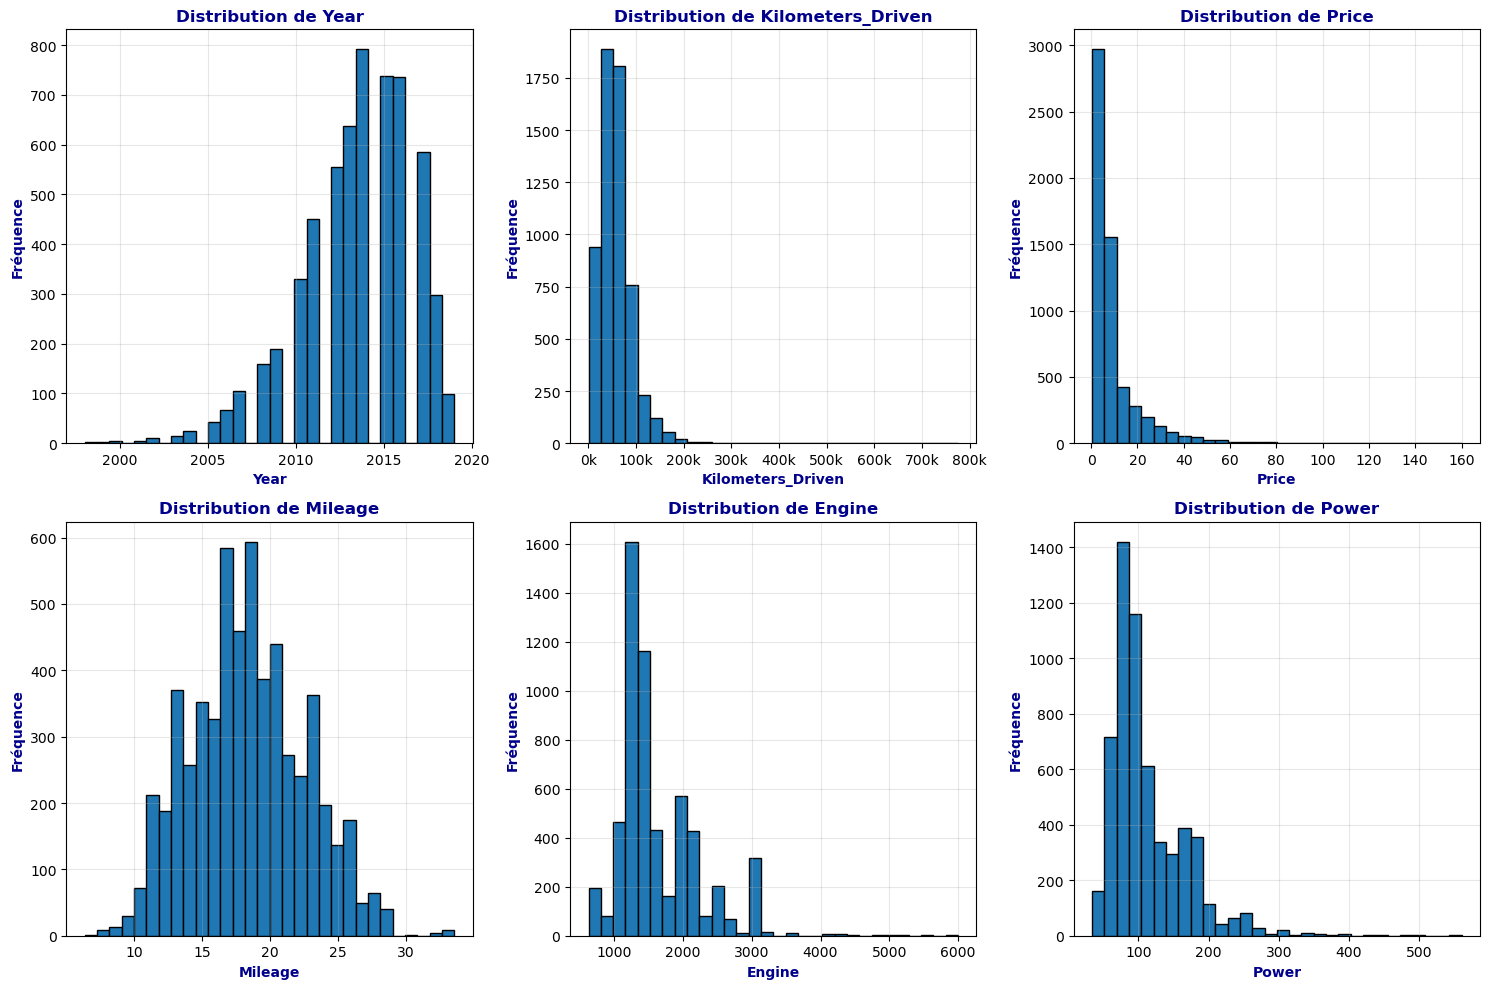

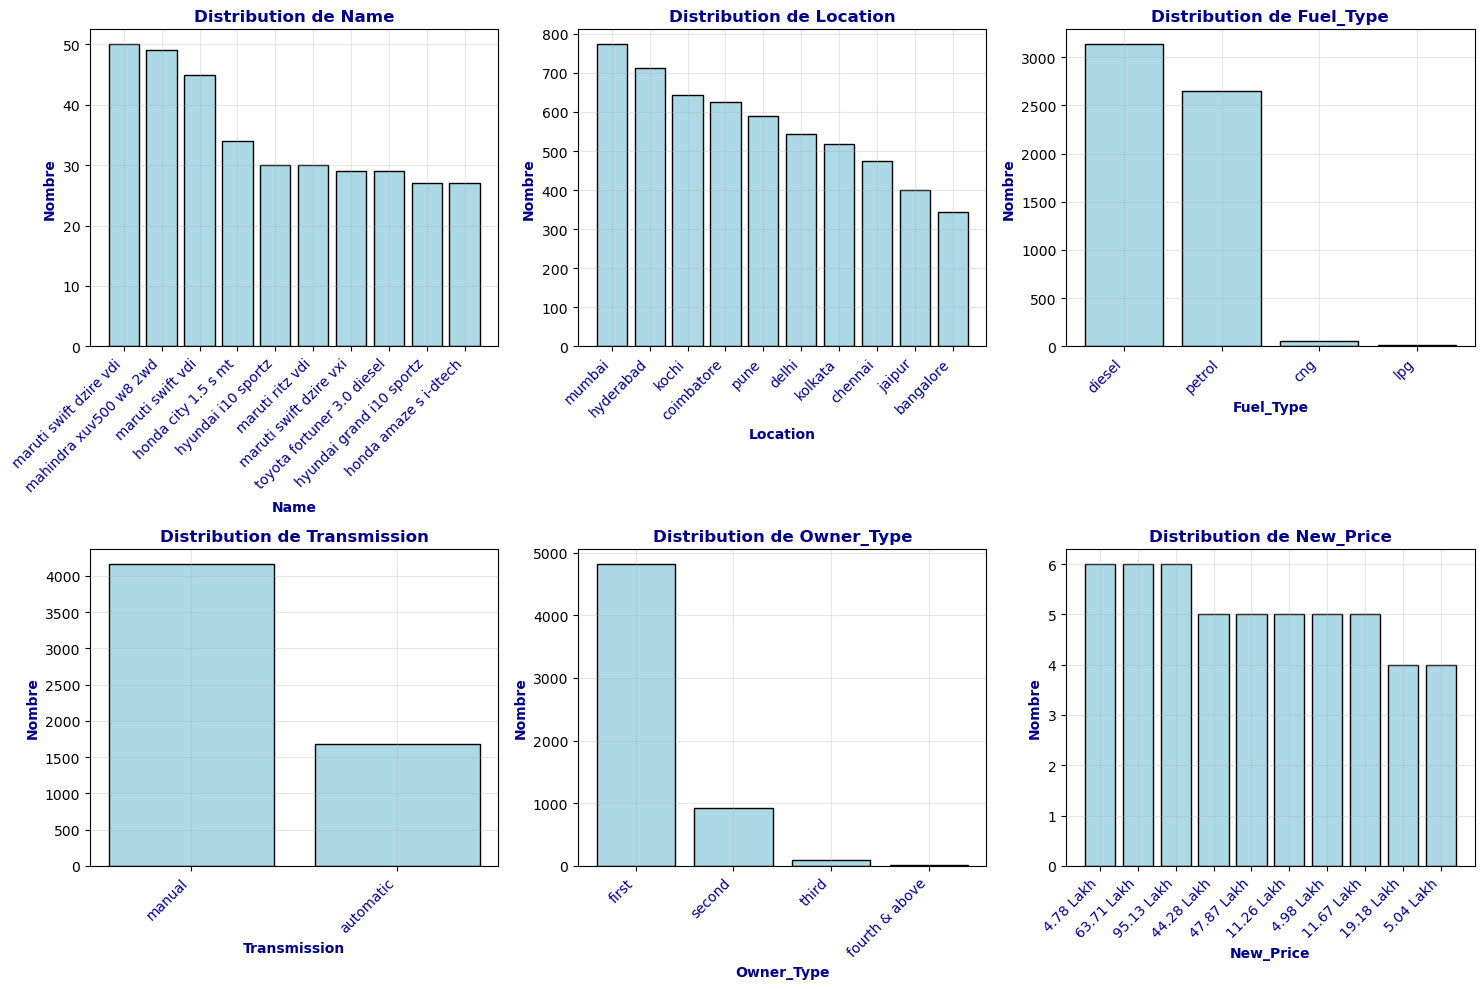

In [76]:
plt.figure(figsize=(15, 10))
numerical_features = ['Year', 'Kilometers_Driven', 'Price', 'Mileage', 'Engine', 'Power', 'Seats']
for i, feature in enumerate(numerical_features):
    if i < 6:
        plt.subplot(2, 3, i+1)
        data = df_clean_qual[feature].dropna()
        plt.hist(data, bins=30, edgecolor='black')
        plt.title(f'Distribution de {feature}', color='darkblue', fontweight='bold')
        plt.grid(True, alpha=0.3)
        if feature == 'Kilometers_Driven':
            plt.gca().xaxis.set_major_formatter(lambda x, p: f'{int(x/1000)}k')
        plt.xlabel(feature, color='darkblue', fontweight='bold')
        plt.ylabel('Fréquence', color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
categorical_features = df_clean_qual.select_dtypes(include=['object']).columns
for i, feature in enumerate(categorical_features):
    if i < 6:
        plt.subplot(2, 3, i+1)
        value_counts = df_clean_qual[feature].value_counts().head(10)
        plt.bar(range(len(value_counts)), value_counts.values, edgecolor='black', color='lightblue')
        plt.title(f'Distribution de {feature}', color='darkblue', fontweight='bold')
        plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right', color='darkblue')
        plt.grid(True, alpha=0.3)
        plt.xlabel(feature, color='darkblue', fontweight='bold')
        plt.ylabel('Nombre', color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show()

### Bivariée


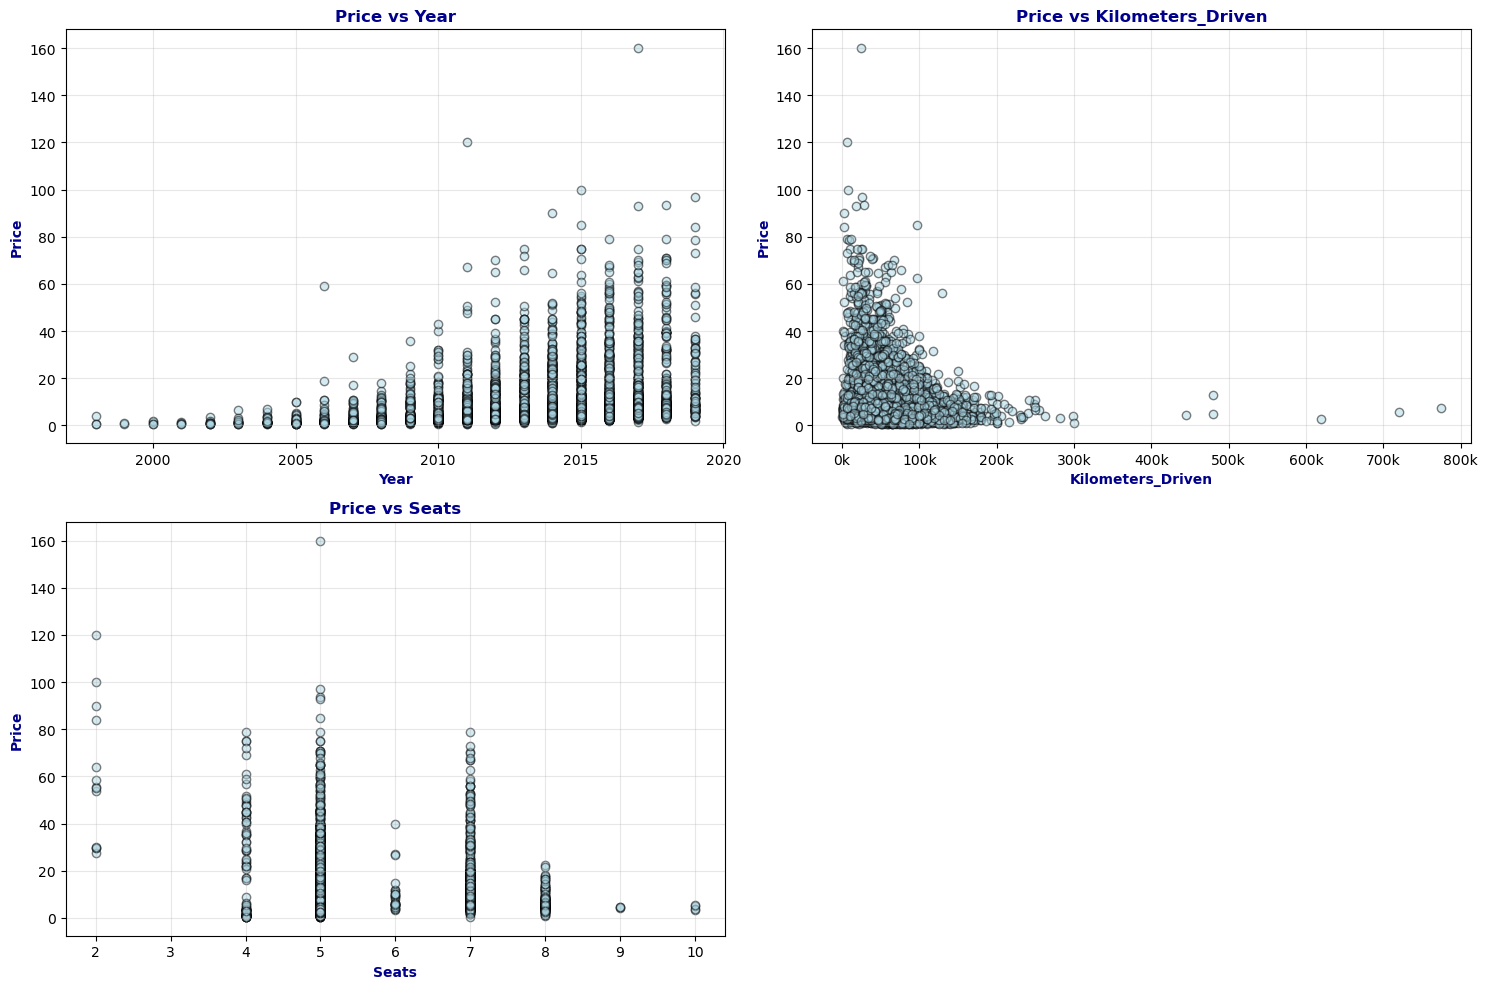

In [77]:
plt.figure(figsize=(15, 10))
numerical_features = ['Year', 'Kilometers_Driven', 'Seats']
for i, feature in enumerate(numerical_features, 1):
    if feature in df_clean_qual.columns:
        plt.subplot(2, 2, i)
        plt.scatter(df_clean_qual[feature], df_clean_qual['Price'], alpha=0.5, color='lightblue', edgecolor='black')
        plt.title(f'Price vs {feature}', color='darkblue', fontweight='bold')
        plt.grid(True, alpha=0.3)
        if feature == 'Kilometers_Driven':
            plt.gca().xaxis.set_major_formatter(lambda x, p: f'{int(x/1000)}k')
        plt.xlabel(feature, color='darkblue', fontweight='bold')
        plt.ylabel('Price', color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show()

On peux voir que les prix sont corrélés avec l'année de la voiture, et nombre de kilomètres parcourus, mais pas forcément pour le nombre de sièges.

### Multivariée

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

print(f"{CYAN}ANALYSE MULTIVARIÉE{ENDC}")

# 1. Matrice de corrélation pour les variables numériques
numerical_columns = ['Year', 'Kilometers_Driven', 'Price', 'Mileage', 'Engine', 'Power', 'Seats']
correlation_matrix = df_clean_qual[numerical_columns].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            mask=np.triu(correlation_matrix))
plt.title('Matrice de corrélation des variables numériques', color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Analyse des relations entre variables catégorielles et prix
print(f"\n{CYAN}RELATION ENTRE VARIABLES CATÉGORIELLES ET PRIX{ENDC}")

categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']
plt.figure(figsize=(15, 10))
for i, cat in enumerate(categorical_columns, 1):
    print(f"\n{BLUE}Prix moyen par {cat}:{ENDC}")
    avg_price = df_clean_qual.groupby(cat)['Price'].agg(['mean', 'count']).round(2)
    avg_price = avg_price.sort_values('mean', ascending=False)
    print(avg_price)
    
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_clean_qual, x=cat, y='Price', color='lightblue', edgecolor='black')
    plt.title(f'Distribution des prix par {cat}', color='darkblue', fontweight='bold')
    plt.xticks(rotation=45, ha='right', color='darkblue')
    plt.xlabel(cat, color='darkblue', fontweight='bold')
    plt.ylabel('Prix', color='darkblue', fontweight='bold')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Analyse croisée des variables catégorielles
print(f"\n{CYAN}ANALYSE CROISÉE DES VARIABLES CATÉGORIELLES{ENDC}")
for i, cat1 in enumerate(categorical_columns):
    for cat2 in categorical_columns[i+1:]:
        print(f"\n{BLUE}Table de contingence entre {cat1} et {cat2}:{ENDC}")
        contingency = pd.crosstab(df_clean_qual[cat1], df_clean_qual[cat2])
        print(contingency)
        
        # Test du chi2
        chi2, p_value = chi2_contingency(contingency)[:2]
        print(f"\n{BLUE}Test du chi2:{ENDC}")
        print(f"Chi2 = {chi2:.2f}")
        print(f"p-value = {p_value:.4f}")

# 4. Relations entre variables numériques par catégorie
print(f"\n{CYAN}RELATIONS ENTRE VARIABLES NUMÉRIQUES PAR CATÉGORIE{ENDC}")
plt.figure(figsize=(15, 10))
for i, cat in enumerate(['Transmission', 'Fuel_Type'], 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(data=df_clean_qual, 
                    x='Kilometers_Driven', 
                    y='Price', 
                    hue=cat,
                    alpha=0.6)
    plt.title(f'Prix vs Kilométrage par {cat}', color='darkblue', fontweight='bold')
    if 'Kilometers_Driven' in plt.gca().get_xlabel():
        plt.gca().xaxis.set_major_formatter(lambda x, p: f'{int(x/1000)}k')
    plt.xlabel('Kilometers_Driven', color='darkblue', fontweight='bold')
    plt.ylabel('Prix', color='darkblue', fontweight='bold')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'scipy'